In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [434]:
train_data = pd.read_csv('TRAIN.csv')
test_data = pd.read_csv('TEST_FINAL.csv')

In [435]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [436]:
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [437]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [438]:
train_data.sort_values(by=['Store_id','Date'],ascending=[True,True],inplace=True)
train_data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60,42369.00
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72,50037.00
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64,44397.00
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63,47604.00
...,...,...,...,...,...,...,...,...,...,...
186722,T1186723,365,S2,L1,R2,2019-05-27,0,Yes,55,39993.00
186986,T1186987,365,S2,L1,R2,2019-05-28,0,Yes,70,54132.00
187479,T1187480,365,S2,L1,R2,2019-05-29,0,No,31,22692.00
187617,T1187618,365,S2,L1,R2,2019-05-30,0,No,45,31671.00


In [439]:
test_data.sort_values(by=['Store_id','Date'],ascending=[True,True],inplace=True)
test_data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
310,T1188651,1,S1,L3,R1,2019-06-01,0,No
709,T1189050,1,S1,L3,R1,2019-06-02,0,No
996,T1189337,1,S1,L3,R1,2019-06-03,0,No
1291,T1189632,1,S1,L3,R1,2019-06-04,0,No
1796,T1190137,1,S1,L3,R1,2019-06-05,1,No
...,...,...,...,...,...,...,...,...
20704,T1209045,365,S2,L1,R2,2019-07-27,0,No
21021,T1209362,365,S2,L1,R2,2019-07-28,0,No
21179,T1209520,365,S2,L1,R2,2019-07-29,0,No
21690,T1210031,365,S2,L1,R2,2019-07-30,0,No


In [440]:
df = pd.concat([train_data,test_data],axis=0)
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9.0,7011.84
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,60.0,42369.00
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,72.0,50037.00
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,64.0,44397.00
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,63.0,47604.00
...,...,...,...,...,...,...,...,...,...,...
20704,T1209045,365,S2,L1,R2,2019-07-27,0,No,NaN,NaN
21021,T1209362,365,S2,L1,R2,2019-07-28,0,No,NaN,NaN
21179,T1209520,365,S2,L1,R2,2019-07-29,0,No,NaN,NaN
21690,T1210031,365,S2,L1,R2,2019-07-30,0,No,NaN,NaN


In [355]:
#train[train['Store_id']==1]

In [441]:
df.isnull().sum()

ID                   0
Store_id             0
Store_Type           0
Location_Type        0
Region_Code          0
Date                 0
Holiday              0
Discount             0
#Order           22265
Sales            22265
dtype: int64

In [442]:
df.drop('#Order',axis=1,inplace=True)
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,7011.84
607,T1000608,1,S1,L3,R1,2018-01-02,0,Yes,42369.00
1046,T1001047,1,S1,L3,R1,2018-01-03,0,Yes,50037.00
1207,T1001208,1,S1,L3,R1,2018-01-04,0,Yes,44397.00
1752,T1001753,1,S1,L3,R1,2018-01-05,0,Yes,47604.00
...,...,...,...,...,...,...,...,...,...
20704,T1209045,365,S2,L1,R2,2019-07-27,0,No,NaN
21021,T1209362,365,S2,L1,R2,2019-07-28,0,No,NaN
21179,T1209520,365,S2,L1,R2,2019-07-29,0,No,NaN
21690,T1210031,365,S2,L1,R2,2019-07-30,0,No,NaN


In [443]:
df.dtypes

ID                       object
Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Sales                   float64
dtype: object

In [444]:
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['Year'] = df['Date'].dt.year.astype(str)
df['Month'] = df['Date'].dt.month.astype(str)
df['DayOfWeek'] = df['Date'].dt.dayofweek.astype(str)

In [445]:
df['Store_Location_Region'] = df[['Store_Type','Location_Type','Region_Code']].apply(lambda x: '_'.join(x), axis = 1)
df = df.drop(['Store_Type','Location_Type','Region_Code'],axis=1)
df

,ID,Store_id,Date,Holiday,Discount,Sales,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region
0,T1000001,1,2018-01-01,1,Yes,7011.84,1,1,2018,1,0,S1_L3_R1
607,T1000608,1,2018-01-02,0,Yes,42369.00,2,1,2018,1,1,S1_L3_R1
1046,T1001047,1,2018-01-03,0,Yes,50037.00,3,1,2018,1,2,S1_L3_R1
1207,T1001208,1,2018-01-04,0,Yes,44397.00,4,1,2018,1,3,S1_L3_R1
1752,T1001753,1,2018-01-05,0,Yes,47604.00,5,1,2018,1,4,S1_L3_R1
...,...,...,...,...,...,...,...,...,...,...,...,...
20704,T1209045,365,2019-07-27,0,No,NaN,27,30,2019,7,5,S2_L1_R2
21021,T1209362,365,2019-07-28,0,No,NaN,28,30,2019,7,6,S2_L1_R2
21179,T1209520,365,2019-07-29,0,No,NaN,29,31,2019,7,0,S2_L1_R2
21690,T1210031,365,2019-07-30,0,No,NaN,30,31,2019,7,1,S2_L1_R2


In [446]:
df.dtypes

ID                               object
Store_id                          int64
Date                     datetime64[ns]
Holiday                           int64
Discount                         object
Sales                           float64
Day                               int64
WeekOfYear                        int64
Year                             object
Month                            object
DayOfWeek                        object
Store_Location_Region            object
dtype: object

In [447]:
train_data = df[:188340]
test_data = df[188340:]

In [448]:
train_data

,ID,Store_id,Date,Holiday,Discount,Sales,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region
0,T1000001,1,2018-01-01,1,Yes,7011.84,1,1,2018,1,0,S1_L3_R1
607,T1000608,1,2018-01-02,0,Yes,42369.00,2,1,2018,1,1,S1_L3_R1
1046,T1001047,1,2018-01-03,0,Yes,50037.00,3,1,2018,1,2,S1_L3_R1
1207,T1001208,1,2018-01-04,0,Yes,44397.00,4,1,2018,1,3,S1_L3_R1
1752,T1001753,1,2018-01-05,0,Yes,47604.00,5,1,2018,1,4,S1_L3_R1
...,...,...,...,...,...,...,...,...,...,...,...,...
186722,T1186723,365,2019-05-27,0,Yes,39993.00,27,22,2019,5,0,S2_L1_R2
186986,T1186987,365,2019-05-28,0,Yes,54132.00,28,22,2019,5,1,S2_L1_R2
187479,T1187480,365,2019-05-29,0,No,22692.00,29,22,2019,5,2,S2_L1_R2
187617,T1187618,365,2019-05-30,0,No,31671.00,30,22,2019,5,3,S2_L1_R2


In [449]:
# Sqrt transformation of Sales
train_data.insert(len(train_data.columns), 'Sales_Sqrt', np.sqrt(train_data.iloc[:,5]))
# Log transformation of Sales
train_data.insert(len(train_data.columns), 'Sales_log', np.log(train_data['Sales']))
for i,val in train_data['Sales_log'].items():
    if val == float("-inf"):
        train_data['Sales_log'][i] = 0
print((train_data['Sales_log']==float("-inf")).sum())

0


In [450]:
train_data

,ID,Store_id,Date,Holiday,Discount,Sales,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region,Sales_Sqrt,Sales_log
0,T1000001,1,2018-01-01,1,Yes,7011.84,1,1,2018,1,0,S1_L3_R1,83.736730,8.855355
607,T1000608,1,2018-01-02,0,Yes,42369.00,2,1,2018,1,1,S1_L3_R1,205.837314,10.654172
1046,T1001047,1,2018-01-03,0,Yes,50037.00,3,1,2018,1,2,S1_L3_R1,223.689517,10.820518
1207,T1001208,1,2018-01-04,0,Yes,44397.00,4,1,2018,1,3,S1_L3_R1,210.705956,10.700927
1752,T1001753,1,2018-01-05,0,Yes,47604.00,5,1,2018,1,4,S1_L3_R1,218.183409,10.770672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186722,T1186723,365,2019-05-27,0,Yes,39993.00,27,22,2019,5,0,S2_L1_R2,199.982499,10.596460
186986,T1186987,365,2019-05-28,0,Yes,54132.00,28,22,2019,5,1,S2_L1_R2,232.662846,10.899181
187479,T1187480,365,2019-05-29,0,No,22692.00,29,22,2019,5,2,S2_L1_R2,150.638640,10.029768
187617,T1187618,365,2019-05-30,0,No,31671.00,30,22,2019,5,3,S2_L1_R2,177.963479,10.363157


In [451]:
test_data = test_data.drop('Sales',axis=1)
test_data

,ID,Store_id,Date,Holiday,Discount,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region
310,T1188651,1,2019-06-01,0,No,1,22,2019,6,5,S1_L3_R1
709,T1189050,1,2019-06-02,0,No,2,22,2019,6,6,S1_L3_R1
996,T1189337,1,2019-06-03,0,No,3,23,2019,6,0,S1_L3_R1
1291,T1189632,1,2019-06-04,0,No,4,23,2019,6,1,S1_L3_R1
1796,T1190137,1,2019-06-05,1,No,5,23,2019,6,2,S1_L3_R1
...,...,...,...,...,...,...,...,...,...,...,...
20704,T1209045,365,2019-07-27,0,No,27,30,2019,7,5,S2_L1_R2
21021,T1209362,365,2019-07-28,0,No,28,30,2019,7,6,S2_L1_R2
21179,T1209520,365,2019-07-29,0,No,29,31,2019,7,0,S2_L1_R2
21690,T1210031,365,2019-07-30,0,No,30,31,2019,7,1,S2_L1_R2


In [376]:
df_col = df.columns
df_col

Index(['ID', 'Store_id', 'Date', 'Holiday', 'Discount', 'Sales', 'Day',
       'WeekOfYear', 'Year', 'Month', 'DayOfWeek', 'Store_Location_Region'],
      dtype='object')

In [452]:
num_col = ['Store_id','Day','WeekOfYear','Sales','Date']
cat_col_1 = ['Holiday', 'Discount', 'Year']
cat_col_2 = ['Month', 'DayOfWeek']
#cat_col_2 = ['Store_Location_Region' ,'Month', 'DayOfWeek']

In [453]:
cat_col_df_1 = df[['Holiday', 'Discount', 'Year']]
cat_col_df_1 = pd.get_dummies(cat_col_df_1, drop_first=True)
cat_col_df_1

,Holiday,Discount_Yes,Year_2019
0,1,1,0
607,0,1,0
1046,0,1,0
1207,0,1,0
1752,0,1,0
...,...,...,...
20704,0,0,1
21021,0,0,1
21179,0,0,1
21690,0,0,1


In [454]:
cat_col_df_2 = df[['Month','DayOfWeek']]
cat_col_df_2 = pd.get_dummies(cat_col_df_2)
cat_col_df_2

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
607,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1046,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1752,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20704,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
21021,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
21179,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
21690,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [455]:
cat_col_df = pd.concat([cat_col_df_1,cat_col_df_2],axis=1)
cat_col_df

,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
607,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1046,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1207,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1752,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20704,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
21021,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21179,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
21690,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [456]:
cat_col_df.columns

Index(['Holiday', 'Discount_Yes', 'Year_2019', 'Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'DayOfWeek_0',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6'],
      dtype='object')

In [457]:
df = pd.concat([df[num_col],cat_col_df],axis=1)
df

,Store_id,Day,WeekOfYear,Sales,Date,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,1,1,1,7011.84,2018-01-01,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
607,1,2,1,42369.00,2018-01-02,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1046,1,3,1,50037.00,2018-01-03,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1207,1,4,1,44397.00,2018-01-04,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1752,1,5,1,47604.00,2018-01-05,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20704,365,27,30,NaN,2019-07-27,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
21021,365,28,30,NaN,2019-07-28,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
21179,365,29,31,NaN,2019-07-29,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
21690,365,30,31,NaN,2019-07-30,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

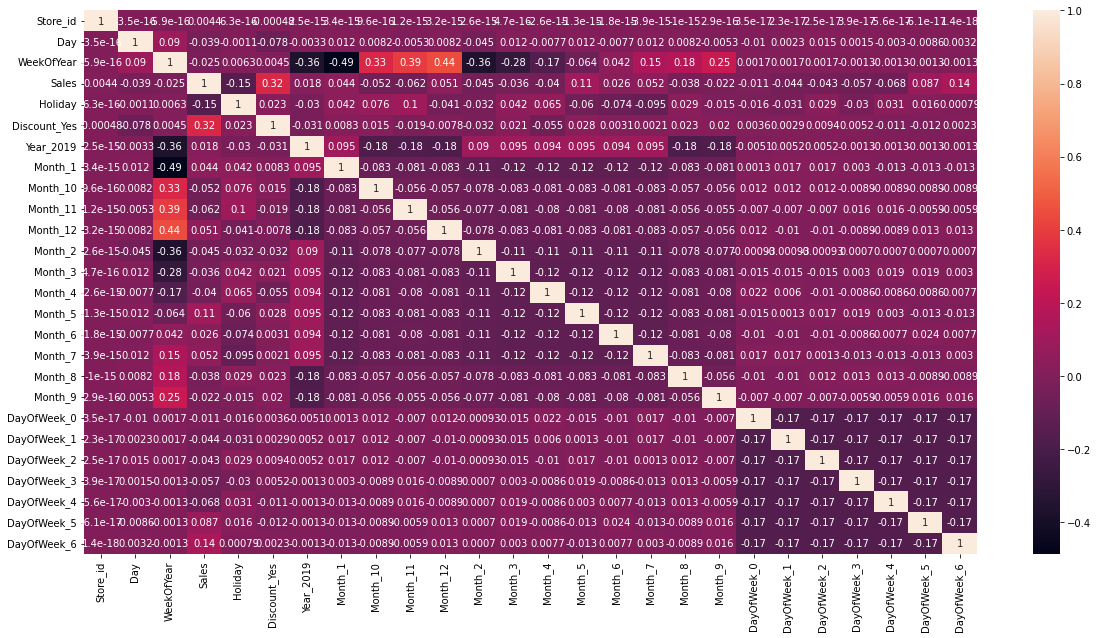

In [190]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [458]:
df1 = df.copy()

In [459]:
df.set_index('Date',inplace=True)
df

,Store_id,Day,WeekOfYear,Sales,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,1,1,7011.84,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-01-02,1,2,1,42369.00,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-01-03,1,3,1,50037.00,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-01-04,1,4,1,44397.00,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-05,1,5,1,47604.00,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-27,365,27,30,NaN,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2019-07-28,365,28,30,NaN,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2019-07-29,365,29,31,NaN,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [460]:
df.isnull().sum()

Store_id            0
Day                 0
WeekOfYear          0
Sales           22265
Holiday             0
Discount_Yes        0
Year_2019           0
Month_1             0
Month_10            0
Month_11            0
Month_12            0
Month_2             0
Month_3             0
Month_4             0
Month_5             0
Month_6             0
Month_7             0
Month_8             0
Month_9             0
DayOfWeek_0         0
DayOfWeek_1         0
DayOfWeek_2         0
DayOfWeek_3         0
DayOfWeek_4         0
DayOfWeek_5         0
DayOfWeek_6         0
dtype: int64

In [461]:
train = df[df.index < '2019-06-01']
test = df[df.index >= '2019-06-01']

In [462]:
train.shape, test.shape

((188340, 26), (22265, 26))

In [388]:
test

,Store_id,Day,WeekOfYear,Sales,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,1,1,22,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-06-02,1,2,22,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-06-03,1,3,23,NaN,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2019-06-04,1,4,23,NaN,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-06-05,1,5,23,NaN,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-27,365,27,30,NaN,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2019-07-28,365,28,30,NaN,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2019-07-29,365,29,31,NaN,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


### MinMaxScaler

In [463]:
scaler = MinMaxScaler()
scaler.fit(train.drop(['Sales'], axis = 1))
train_n = scaler.transform(train.drop(['Sales'], axis = 1))

In [464]:
scaler = MinMaxScaler()
scaler.fit(test.drop(['Sales'], axis = 1))
test_n = scaler.transform(test.drop(['Sales'], axis = 1))

### StandardScaler

In [251]:
scaler = StandardScaler()
scaler.fit(train.drop([ 'Sales'], axis = 1))
train_n = scaler.transform(train.drop(['Sales'], axis = 1))

In [252]:
scaler = StandardScaler()
scaler.fit(test.drop(['Sales'], axis = 1))
test_n = scaler.transform(test.drop(['Sales'], axis = 1))

In [465]:
train

,Store_id,Day,WeekOfYear,Sales,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,1,1,7011.84,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2018-01-02,1,2,1,42369.00,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2018-01-03,1,3,1,50037.00,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2018-01-04,1,4,1,44397.00,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-05,1,5,1,47604.00,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,365,27,22,39993.00,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2019-05-28,365,28,22,54132.00,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-05-29,365,29,22,22692.00,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [466]:
train_n = np.array(train_n)
train_norm = pd.DataFrame(train_n, columns=train.columns.drop(['Sales']))

In [467]:
train_norm.head()

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.033333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.066667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.133333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [468]:
test_n = np.array(test_n)
test_norm = pd.DataFrame(test_n, columns=test.columns.drop(['Sales']))

In [469]:
test_norm.head()

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.066667,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.100000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.133333,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [470]:
train_data

,ID,Store_id,Date,Holiday,Discount,Sales,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region,Sales_Sqrt,Sales_log
0,T1000001,1,2018-01-01,1,Yes,7011.84,1,1,2018,1,0,S1_L3_R1,83.736730,8.855355
607,T1000608,1,2018-01-02,0,Yes,42369.00,2,1,2018,1,1,S1_L3_R1,205.837314,10.654172
1046,T1001047,1,2018-01-03,0,Yes,50037.00,3,1,2018,1,2,S1_L3_R1,223.689517,10.820518
1207,T1001208,1,2018-01-04,0,Yes,44397.00,4,1,2018,1,3,S1_L3_R1,210.705956,10.700927
1752,T1001753,1,2018-01-05,0,Yes,47604.00,5,1,2018,1,4,S1_L3_R1,218.183409,10.770672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186722,T1186723,365,2019-05-27,0,Yes,39993.00,27,22,2019,5,0,S2_L1_R2,199.982499,10.596460
186986,T1186987,365,2019-05-28,0,Yes,54132.00,28,22,2019,5,1,S2_L1_R2,232.662846,10.899181
187479,T1187480,365,2019-05-29,0,No,22692.00,29,22,2019,5,2,S2_L1_R2,150.638640,10.029768
187617,T1187618,365,2019-05-30,0,No,31671.00,30,22,2019,5,3,S2_L1_R2,177.963479,10.363157


In [471]:
train_norm_merge = train_norm
train_norm_merge['Sales'] = train_data['Sales']
train_norm_merge['Sales_Sqrt'] = train_data['Sales_Sqrt']
train_norm_merge['Sales_log'] = train_data['Sales_log']
train_norm_merge.head()

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Sales,Sales_Sqrt,Sales_log
0,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7011.84,83.736730,8.855355
1,0.0,0.033333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51789.12,227.572230,10.854935
2,0.0,0.066667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36868.20,192.010937,10.515105
3,0.0,0.100000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19715.16,140.410683,9.889143
4,0.0,0.133333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45614.52,213.575560,10.727981


In [472]:
train_df = train_norm_merge
test_df = test_norm

In [473]:
test_norm.head(5)

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.066667,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.100000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.133333,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [474]:
train_df

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Sales,Sales_Sqrt,Sales_log
0,0.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7011.84,83.736730,8.855355
1,0.0,0.033333,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51789.12,227.572230,10.854935
2,0.0,0.066667,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36868.20,192.010937,10.515105
3,0.0,0.100000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19715.16,140.410683,9.889143
4,0.0,0.133333,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45614.52,213.575560,10.727981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1.0,0.866667,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37272.00,193.059576,10.525998
188336,1.0,0.900000,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54572.64,233.607877,10.907288
188337,1.0,0.933333,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31624.56,177.832955,10.361689
188338,1.0,0.966667,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,49162.41,221.725980,10.802885


### Train_Test_Split

In [475]:
X = train_df.drop(['Sales','Sales_Sqrt','Sales_log'], axis=1)
y = train_df['Sales_log'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.1, shuffle=False)

In [476]:
X_train

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.033333,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.066667,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.100000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.133333,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169501,0.901099,0.333333,0.705882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
169502,0.901099,0.366667,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
169503,0.901099,0.400000,0.705882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
169504,0.901099,0.433333,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [477]:
y_train

array([ 8.85535543, 10.85493537, 10.51510467, ..., 10.33276684,
       11.26142102, 10.67560764])

In [478]:
X_cv

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
169506,0.901099,0.500000,0.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
169507,0.901099,0.533333,0.725490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
169508,0.901099,0.566667,0.725490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
169509,0.901099,0.600000,0.725490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
169510,0.901099,0.633333,0.725490,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1.000000,0.866667,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
188336,1.000000,0.900000,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
188337,1.000000,0.933333,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
188338,1.000000,0.966667,0.411765,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [479]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((169506, 25), (169506,), (18834, 25), (18834,))

In [480]:
from math import sqrt
from sklearn.metrics import mean_squared_log_error

In [481]:
import lightgbm as lgb
data_train = lgb.Dataset(X_train, label=y_train)
data_test = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 3500,
         'num_leaves': 80,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=data_train, valid_sets=[data_test])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv,y_pred_lgbm)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 169506, number of used features: 25
[LightGBM] [Info] Start training from score 10.558627
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.4646
[200]	valid_0's rmse: 0.479606
Early stopping, best iteration is:
[1]	valid_0's rmse: 0.449225
RMSLE: 0.038480144294858756


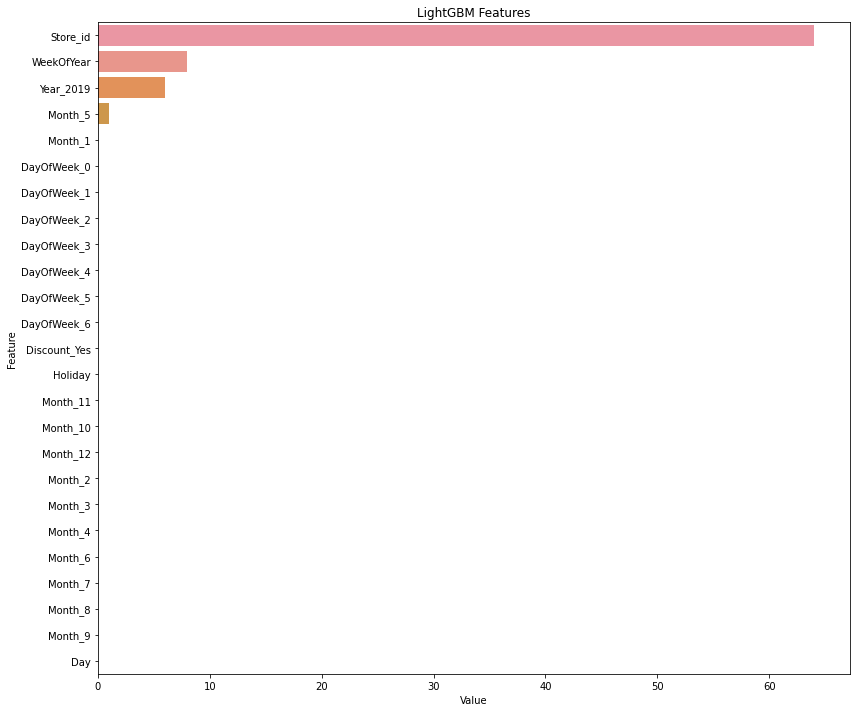

In [482]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [483]:
test_X = test_df
test_X

,Store_id,Day,WeekOfYear,Holiday,Discount_Yes,Year_2019,Month_1,Month_10,Month_11,Month_12,...,Month_7,Month_8,Month_9,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.066667,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.100000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.133333,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,1.0,0.866667,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22261,1.0,0.900000,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22262,1.0,0.933333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22263,1.0,0.966667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [484]:
from sklearn.model_selection import TimeSeriesSplit, KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

#fold = KFold(n_splits=15, shuffle=True, random_state=42)
fold = TimeSeriesSplit(n_splits=5)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=50, max_depth=20, learning_rate=0.15, n_estimators=100, min_child_samples=20, subsample=0.90)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_log_error(y_test,y_pred_lgbm)))
    p = lgbm.predict(test_X)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.036696803577428126
RMSLE LGBM:  0.039035934378098824
RMSLE LGBM:  0.0660124226695032
RMSLE LGBM:  0.04528437201014961
RMSLE LGBM:  0.050925945355525755


In [485]:
np.mean(errlgb,0)

0.047591095598141106

In [274]:
y_pred_totlgb

[array([10.57290513, 10.57290513, 10.57290513, ..., 10.54793416,
        10.54793416, 10.54793416]),
 array([10.59955007, 10.59955007, 10.59955007, ..., 10.63314023,
        10.63314023, 10.63314023]),
 array([10.64812989, 10.64812989, 10.64812989, ..., 10.52921578,
        10.52921578, 10.52921578]),
 array([10.64349225, 10.64349225, 10.64349225, ..., 10.59230496,
        10.59230496, 10.59230496]),
 array([10.59059229, 10.59059229, 10.59059229, ..., 10.56011358,
        10.56011358, 10.56011358])]

In [275]:
np.mean(y_pred_totlgb,0)

array([10.61093393, 10.61093393, 10.61093393, ..., 10.57254174,
       10.57254174, 10.57254174])

In [486]:
np.exp(np.mean(y_pred_totlgb,0))

array([40574.24847589, 40574.24847589, 40574.24847589, ...,
       39047.79716186, 39047.79716186, 39047.79716186])

In [141]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([10.80934541, 10.58397744, 11.20200386, ..., 10.81435625,
       10.40883494, 10.17987733])

In [145]:
lgbm_final = np.exp(lgbm_final)
lgbm_final

array([49481.06779968, 39496.89910322, 73277.13227402, ...,
       49729.63200527, 33151.22461321, 26367.23259706])

In [143]:
test_data['ID']

0        T1188341
1        T1188342
2        T1188343
3        T1188344
4        T1188345
           ...   
22260    T1210601
22261    T1210602
22262    T1210603
22263    T1210604
22264    T1210605
Name: ID, Length: 22265, dtype: object

In [146]:
submission = pd.DataFrame({
        "ID": test_data['ID'],
        "Sales": lgbm_final
    })
submission.to_csv('submission.csv', index=False)
print(submission)

             ID         Sales
0      T1188341  49481.067800
1      T1188342  39496.899103
2      T1188343  73277.132274
3      T1188344  40695.879570
4      T1188345  41672.625647
...         ...           ...
22260  T1210601  21115.872517
22261  T1210602  58706.147056
22262  T1210603  49729.632005
22263  T1210604  33151.224613
22264  T1210605  26367.232597

[22265 rows x 2 columns]


In [122]:
submission = pd.DataFrame({
        "ID": test_data['ID'],
        "Sales": lgbm_final
    })
submission.to_csv('submission.csv', index=False)
print(submission)

                  ID         Sales
Date                              
2019-06-01  T1188341  64460.289779
2019-06-01  T1188342  49194.899561
2019-06-01  T1188343  85954.314391
2019-06-01  T1188344  49096.061362
2019-06-01  T1188345  50814.612521
...              ...           ...
2019-07-31  T1210601  21341.280419
2019-07-31  T1210602  55638.274437
2019-07-31  T1210603  51569.487696
2019-07-31  T1210604  33944.686069
2019-07-31  T1210605  27455.459926

[22265 rows x 2 columns]


### CatBoost

In [135]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor

In [338]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor

errcb = []
y_pred_totcb = []

#fold = KFold(n_splits=15, shuffle=False, random_state=42)
fold = TimeSeriesSplit(n_splits=3)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = pd.Series(y[train_index]), pd.Series(y[test_index])

    cb = CatBoostRegressor(l2_leaf_reg=500, depth=10, learning_rate=0.001, n_estimators=3000)
    cb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_cb = cb.predict(X_test)
    print("RMSLE CATBOOST: ", sqrt(mean_squared_log_error(y_test, y_pred_cb)))

    errcb.append(sqrt(mean_squared_log_error(y_test, y_pred_cb)))
    p = cb.predict(test_X)
    y_pred_totcb.append(p)

RMSLE CATBOOST:  0.034205810236597814
RMSLE CATBOOST:  0.05747676581713321
RMSLE CATBOOST:  0.04701352448369993


In [339]:
np.mean(errcb,0)

0.04623203351247698

In [340]:
cb_final = np.exp(np.mean(y_pred_totcb,0))
cb_final

array([39411.24993214, 39473.78585654, 39473.78585654, ...,
       43973.1259663 , 34165.22326448, 33652.47097009])

### XGBOOST

In [341]:
from xgboost import XGBRegressor

In [487]:
from sklearn.metrics import mean_squared_log_error
errxgb = []
y_pred_totxgb = []

#fold = KFold(n_splits=3, shuffle=True, random_state=None)
fold = TimeSeriesSplit(n_splits=3)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xgb = XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=1000,n_jobs=-1,min_child_weight=20, subsample=0.80,random_state=42)
    xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_xgb = xgb.predict(X_test)
    print("RMSLE XGBOOST: ", sqrt(mean_squared_log_error(y_test, y_pred_xgb)))

    errxgb.append(sqrt(mean_squared_log_error(y_test, y_pred_xgb)))
    p = xgb.predict(test_X)
    y_pred_totxgb.append(p)

RMSLE XGBOOST:  0.03943841361185901
RMSLE XGBOOST:  0.06028998415493872
RMSLE XGBOOST:  0.049064209557103805


In [488]:
np.mean(errxgb,0)

0.04959753577463385

In [489]:
xgb_final_1 = np.exp(np.mean(y_pred_totxgb,0))
xgb_final_1

array([37981.2  , 36235.   , 38312.688, ..., 35556.863, 36744.176,
       35815.582], dtype=float32)

In [156]:
xgb_final = np.mean(y_pred_totxgb,0)
xgb_final

array([50762.965, 43961.906, 82870.68 , ..., 52419.605, 36456.78 ,
       28130.021], dtype=float32)

In [347]:
test_data

,ID,Store_id,Date,Holiday,Discount,Day,WeekOfYear,Year,Month,DayOfWeek,Store_Location_Region
0,T1188341,171,2019-06-01,0,No,1,22,2019,6,5,S4_L2_R3
1,T1188342,172,2019-06-01,0,No,1,22,2019,6,5,S1_L1_R1
2,T1188343,173,2019-06-01,0,No,1,22,2019,6,5,S4_L2_R1
3,T1188344,174,2019-06-01,0,No,1,22,2019,6,5,S1_L1_R4
4,T1188345,170,2019-06-01,0,No,1,22,2019,6,5,S1_L1_R2
...,...,...,...,...,...,...,...,...,...,...,...
22260,T1210601,186,2019-07-31,0,No,31,31,2019,7,2,S2_L5_R2
22261,T1210602,11,2019-07-31,0,No,31,31,2019,7,2,S4_L2_R1
22262,T1210603,185,2019-07-31,0,Yes,31,31,2019,7,2,S1_L1_R3
22263,T1210604,69,2019-07-31,0,No,31,31,2019,7,2,S1_L1_R4


In [491]:
submission = pd.DataFrame({
        "ID": test_data['ID'],
        "Sales": xgb_final_1
    })
submission.to_csv('submission_xgb.csv', index=False)
print(submission)

             ID         Sales
310    T1188651  37981.199219
709    T1189050  36235.000000
996    T1189337  38312.687500
1291   T1189632  38294.242188
1796   T1190137  38855.132812
...         ...           ...
20704  T1209045  36587.171875
21021  T1209362  35921.214844
21179  T1209520  35556.863281
21690  T1210031  36744.175781
22264  T1210605  35815.582031

[22265 rows x 2 columns]


### RandomForest

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
errrf = []
y_pred_totrf = []

#fold = KFold(n_splits=15, shuffle=False, random_state=42)
fold = TimeSeriesSplit(n_splits=3)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf = RandomForestRegressor(max_depth=10, n_jobs=-1, n_estimators=100)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    print("RMSLE RANDOMFOREST: ", sqrt(mean_squared_log_error(y_test, y_pred_rf)))

    errrf.append(sqrt(mean_squared_log_error(y_test, y_pred_rf)))
    p = rf.predict(test_X)
    y_pred_totrf.append(p)

RMSLE RANDOMFOREST:  0.039729910722220055
RMSLE RANDOMFOREST:  0.06135250010991978
RMSLE RANDOMFOREST:  0.04959775375818006


In [286]:
np.mean(errrf,0)

0.050226721530106634

In [287]:
np.exp(np.mean(y_pred_totrf,0))

array([26436.15984771, 30405.50005983, 31312.16772036, ...,
       37413.09367365, 39484.84718787, 40813.26957542])